## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM_ = [0.9, 0.8, 0.7, 0.6]
nest = [True, False]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for MOMENTUM in MOMENTUM_:
    for e in nest:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        #print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=e, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "momentum:{}_nesterov:{}".format(MOMENTUM,e)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8

Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.8987 - acc: 0.3161 - val_loss: 1.8169 - val_acc: 0.3571
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6906 - acc: 0.3989 - val_loss: 1.6384 - val_acc: 0.4193
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5893 - acc: 0.4328 - val_loss: 1.5817 - val_acc: 0.4377
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5277 - acc: 0.4558 - val_loss: 1.5222 - val_acc: 0.4534
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4809 - acc: 0.4717 - val_loss: 1.4919 - val_acc: 0.4634
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4450 - acc: 0.4877 - val_loss: 1.4967 - val_acc: 0.4624
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4127 - acc: 0.4935 - val_loss: 1.4629 - val_acc: 0.4758
Epoch 8/50
50000/50000 [=================

Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6198 - acc: 0.4275 - val_loss: 1.6087 - val_acc: 0.4334
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5610 - acc: 0.4496 - val_loss: 1.6186 - val_acc: 0.4115
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5145 - acc: 0.4651 - val_loss: 1.5876 - val_acc: 0.4395
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4684 - acc: 0.4829 - val_loss: 1.4816 - val_acc: 0.4756
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4426 - acc: 0.4880 - val_loss: 1.5865 - val_acc: 0.4356
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4050 - acc: 0.5036 - val_loss: 1.5786 - val_acc: 0.4359
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3829 - acc: 0.5101 - val_loss: 1.4645 - val_acc: 0.4769
Epoch 10/50
50000/50000 [================

Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5166 - acc: 0.4641 - val_loss: 1.5338 - val_acc: 0.4517
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4782 - acc: 0.4753 - val_loss: 1.5242 - val_acc: 0.4660
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4439 - acc: 0.4892 - val_loss: 1.4792 - val_acc: 0.4767
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4184 - acc: 0.4966 - val_loss: 1.4585 - val_acc: 0.4813
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3928 - acc: 0.5074 - val_loss: 1.4774 - val_acc: 0.4733
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3607 - acc: 0.5166 - val_loss: 1.4894 - val_acc: 0.4746
Epoch 11/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3377 - acc: 0.5270 - val_loss: 1.4334 - val_acc: 0.4870
Epoch 12/50
50000/50000 [==============

Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5195 - acc: 0.4660 - val_loss: 1.6006 - val_acc: 0.4265
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4886 - acc: 0.4753 - val_loss: 1.4925 - val_acc: 0.4691
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4602 - acc: 0.4854 - val_loss: 1.5823 - val_acc: 0.4347
Epoch 10/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4339 - acc: 0.4964 - val_loss: 1.4841 - val_acc: 0.4742
Epoch 11/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4156 - acc: 0.4999 - val_loss: 1.5182 - val_acc: 0.4547
Epoch 12/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3889 - acc: 0.5089 - val_loss: 1.4244 - val_acc: 0.4957
Epoch 13/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3684 - acc: 0.5179 - val_loss: 1.5475 - val_acc: 0.4519
Epoch 14/50
50000/50000 [============

Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4481 - acc: 0.4876 - val_loss: 1.5393 - val_acc: 0.4532
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4235 - acc: 0.4960 - val_loss: 1.4672 - val_acc: 0.4798
Epoch 11/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3990 - acc: 0.5067 - val_loss: 1.4641 - val_acc: 0.4807
Epoch 12/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3781 - acc: 0.5140 - val_loss: 1.5142 - val_acc: 0.4718
Epoch 13/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3598 - acc: 0.5176 - val_loss: 1.4732 - val_acc: 0.4697
Epoch 14/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3336 - acc: 0.5302 - val_loss: 1.3980 - val_acc: 0.4983
Epoch 15/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3198 - acc: 0.5341 - val_loss: 1.3973 - val_acc: 0.5022
Epoch 16/50
50000/50000 [==========

Epoch 11/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4624 - acc: 0.4845 - val_loss: 1.4983 - val_acc: 0.4607
Epoch 12/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4427 - acc: 0.4914 - val_loss: 1.4445 - val_acc: 0.4826
Epoch 13/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4246 - acc: 0.4982 - val_loss: 1.5643 - val_acc: 0.4447
Epoch 14/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4070 - acc: 0.5046 - val_loss: 1.5236 - val_acc: 0.4602
Epoch 15/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3891 - acc: 0.5087 - val_loss: 1.4662 - val_acc: 0.4742
Epoch 16/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3747 - acc: 0.5151 - val_loss: 1.4250 - val_acc: 0.4978
Epoch 17/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3596 - acc: 0.5177 - val_loss: 1.4658 - val_acc: 0.4759
Epoch 18/50
50000/50000 [=========

Epoch 13/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3934 - acc: 0.5083 - val_loss: 1.4751 - val_acc: 0.4777
Epoch 14/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3741 - acc: 0.5157 - val_loss: 1.4905 - val_acc: 0.4765
Epoch 15/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3596 - acc: 0.5207 - val_loss: 1.4512 - val_acc: 0.4816
Epoch 16/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3387 - acc: 0.5284 - val_loss: 1.3998 - val_acc: 0.4962
Epoch 17/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3231 - acc: 0.5348 - val_loss: 1.5067 - val_acc: 0.4664
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3052 - acc: 0.5387 - val_loss: 1.4319 - val_acc: 0.4905
Epoch 19/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2917 - acc: 0.5449 - val_loss: 1.4018 - val_acc: 0.4935
Epoch 20/50
50000/50000 [=========

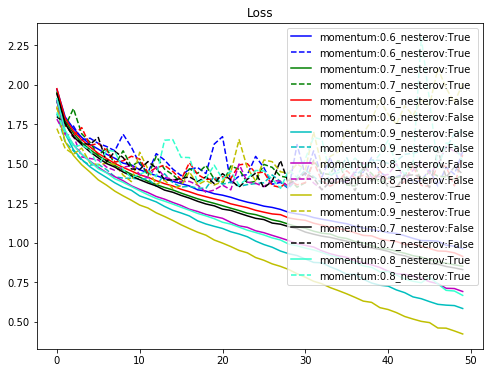

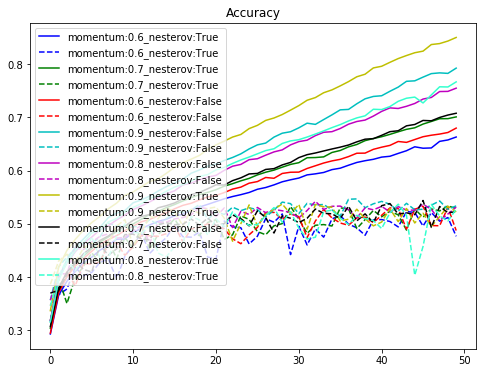

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["b", "g", "r", "c", "m", "y", "k", "#33FFCE"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()